# 🎯 Player Performance Analysis: Finding Your Van Dijk

## *"How Liverpool Found World-Class Players While Others Found Excuses"*

---

### 💎 The Art of Smart Scouting

Remember when everyone said £75M for Van Dijk was too much?

Then he proceeded to:
- ✅ Fix Liverpool's defense overnight
- ✅ Win the Champions League
- ✅ Win the Premier League
- ✅ Win PFA Player of the Year
- ✅ Come 2nd in Ballon d'Or
- ✅ Make every other center-back look like a Sunday league player

Meanwhile, United spent £80M on Harry Maguire who:
- ❌ Made defending look harder than quantum physics
- ❌ Became a walking meme
- ❌ Got benched
- ❌ Lost the captaincy
- ❌ Made United fans question everything

**The difference?** Liverpool had Sport Scientists analyzing every detail. United had... vibes?

---

### 🔬 What We're Analyzing Today:

1. **Position-by-Position Breakdown** (Finding quality in every role)
2. **The Hidden Gems** (Your Robertson, Salah, Firmino moments)
3. **Attribute Analysis** (What actually makes a player good)
4. **Age vs Performance** (Why signing 30+ is usually stupid)
5. **Value for Money** (Liverpool's specialty, United's nightmare)
6. **Indonesian Talent Deep Dive** (Representation matters! 🇮🇩)

All while explaining why **PAYING YOUR SPORT SCIENTISTS** is the difference between:
- 🔴 Winning everything (Liverpool)
- ⚪ Winning the "We Tried" award (You know who)

---

### 🚨 Disclaimer

This notebook contains:
- Actual statistical analysis (unlike United's transfer committee)
- Data-driven insights (revolutionary for some clubs)
- More United slander (they'll survive... probably... maybe)
- Liverpool supremacy (because we actually won stuff)

---

## Let's Find Some World-Class Talent! 🔴⚽

*"If you need a Sport Scientist to tell you Antony isn't worth £85M, you need a new Sport Scientist. Actually, you just need ANY Sport Scientist."*  
— Jürgen Klopp (probably)

---

## 📚 Setup: Loading Our Tools (The Smart Way)

Let's get our environment ready. You know, like how Liverpool prepared for every season with meticulous planning.

Not like how United prepares: panic in August, overspend, hope for the best.

In [11]:
# Import the essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from scipy import stats

warnings.filterwarnings('ignore')

# Liverpool colors for plots (because we have standards)
LIVERPOOL_RED = '#C8102E'
LIVERPOOL_GOLD = '#F6EB61'
LIVERPOOL_TEAL = '#00B2A9'

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette([LIVERPOOL_RED, LIVERPOOL_TEAL, LIVERPOOL_GOLD])
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print("✅ Analysis tools loaded")
print("🔴 Ready to find world-class talent")
print("💡 Unlike United's scouts who apparently use a Magic 8-Ball")

✅ Analysis tools loaded
🔴 Ready to find world-class talent
💡 Unlike United's scouts who apparently use a Magic 8-Ball


In [12]:
# Load the dataset
DATA_DIR = Path('../data/raw')

print("📂 Loading player data...\n")
players = pd.read_csv(DATA_DIR / 'players.csv')
clubs = pd.read_csv(DATA_DIR / 'clubs.csv')

# Merge with club info for context - THIS IS IMPORTANT!
players = players.merge(clubs[['club_id', 'full_name', 'tier']], 
                        on='club_id', 
                        suffixes=('', '_club'))
players.rename(columns={'full_name_club': 'club_name'}, inplace=True)

# Keep a copy for detailed analysis
players_full = players.copy()

print(f"✅ Loaded {len(players)} players from {len(clubs)} clubs")
print(f"💰 Total squad value: £{players['market_value'].sum()/1e6:.0f}M")
print(f"   (Still less than what United wasted on Mount + Antony)\n")

print("📊 Dataset shape:", players.shape)
print("🎯 Ready for proper analysis!")

📂 Loading player data...

✅ Loaded 480 players from 20 clubs
💰 Total squad value: £12896M
   (Still less than what United wasted on Mount + Antony)

📊 Dataset shape: (480, 60)
🎯 Ready for proper analysis!


---

## ⚽ POSITION-BY-POSITION ANALYSIS

### The Liverpool Method: Every Position Matters

Liverpool didn't just buy a striker and hope for the best. They built a TEAM.

- World-class GK: Alisson ✅
- Solid defense: Van Dijk, Robertson, TAA ✅  
- Dynamic midfield: Fabinho, Henderson, Thiago ✅
- Deadly attack: Salah, Mané, Firmino ✅

United's approach: Buy random players, play them out of position, wonder why it doesn't work.

Let's analyze each position properly!

In [13]:
# Position group overview
print("📍 POSITION GROUP ANALYSIS\n" + "="*80)

for position in ['GK', 'DEF', 'MID', 'FWD']:
    pos_players = players[players['position_group'] == position]
    
    print(f"\n{position} - {len(pos_players)} players")
    print(f"   Average rating: {pos_players['overall_rating'].mean():.1f}")
    print(f"   Average age: {pos_players['age'].mean():.1f} years")
    print(f"   Average value: £{pos_players['market_value'].mean()/1e6:.1f}M")
    print(f"   Total value: £{pos_players['market_value'].sum()/1e6:.0f}M")
    
    # Top 3 in position
    top_3 = pos_players.nlargest(3, 'overall_rating')[['full_name', 'overall_rating', 'age', 'market_value']]
    print(f"\n   🌟 Top 3 {position}:")
    for idx, player in top_3.iterrows():
        print(f"      {player['full_name']:30s} | Rating: {player['overall_rating']:.1f} | Age: {player['age']} | Value: £{player['market_value']/1e6:.1f}M")

print("\n" + "="*80)
print("💡 INSIGHT: Balanced investment across all positions = Success")
print("   Liverpool: Invested wisely in every position")
print("   United: Spent £200M on attackers, forgot defense exists")

📍 POSITION GROUP ANALYSIS

GK - 52 players
   Average rating: 65.8
   Average age: 23.7 years
   Average value: £11.3M
   Total value: £586M

   🌟 Top 3 GK:
      Pompeo Luciani                 | Rating: 82.8 | Age: 16 | Value: £80.7M
      Eutimio Simó                   | Rating: 79.9 | Age: 25 | Value: £46.6M
      Nazaret Pascual                | Rating: 79.7 | Age: 21 | Value: £49.3M

DEF - 162 players
   Average rating: 71.5
   Average age: 25.0 years
   Average value: £23.0M
   Total value: £3721M

   🌟 Top 3 DEF:
      Lee Vincent                    | Rating: 94.2 | Age: 26 | Value: £200.0M
      Marcel Adam                    | Rating: 91.1 | Age: 26 | Value: £200.0M
      Russell Cooke                  | Rating: 88.6 | Age: 23 | Value: £200.0M

MID - 157 players
   Average rating: 70.8
   Average age: 24.9 years
   Average value: £27.3M
   Total value: £4282M

   🌟 Top 3 MID:
      Espiridión Valcárcel           | Rating: 89.2 | Age: 29 | Value: £135.4M
      Luka Loos        

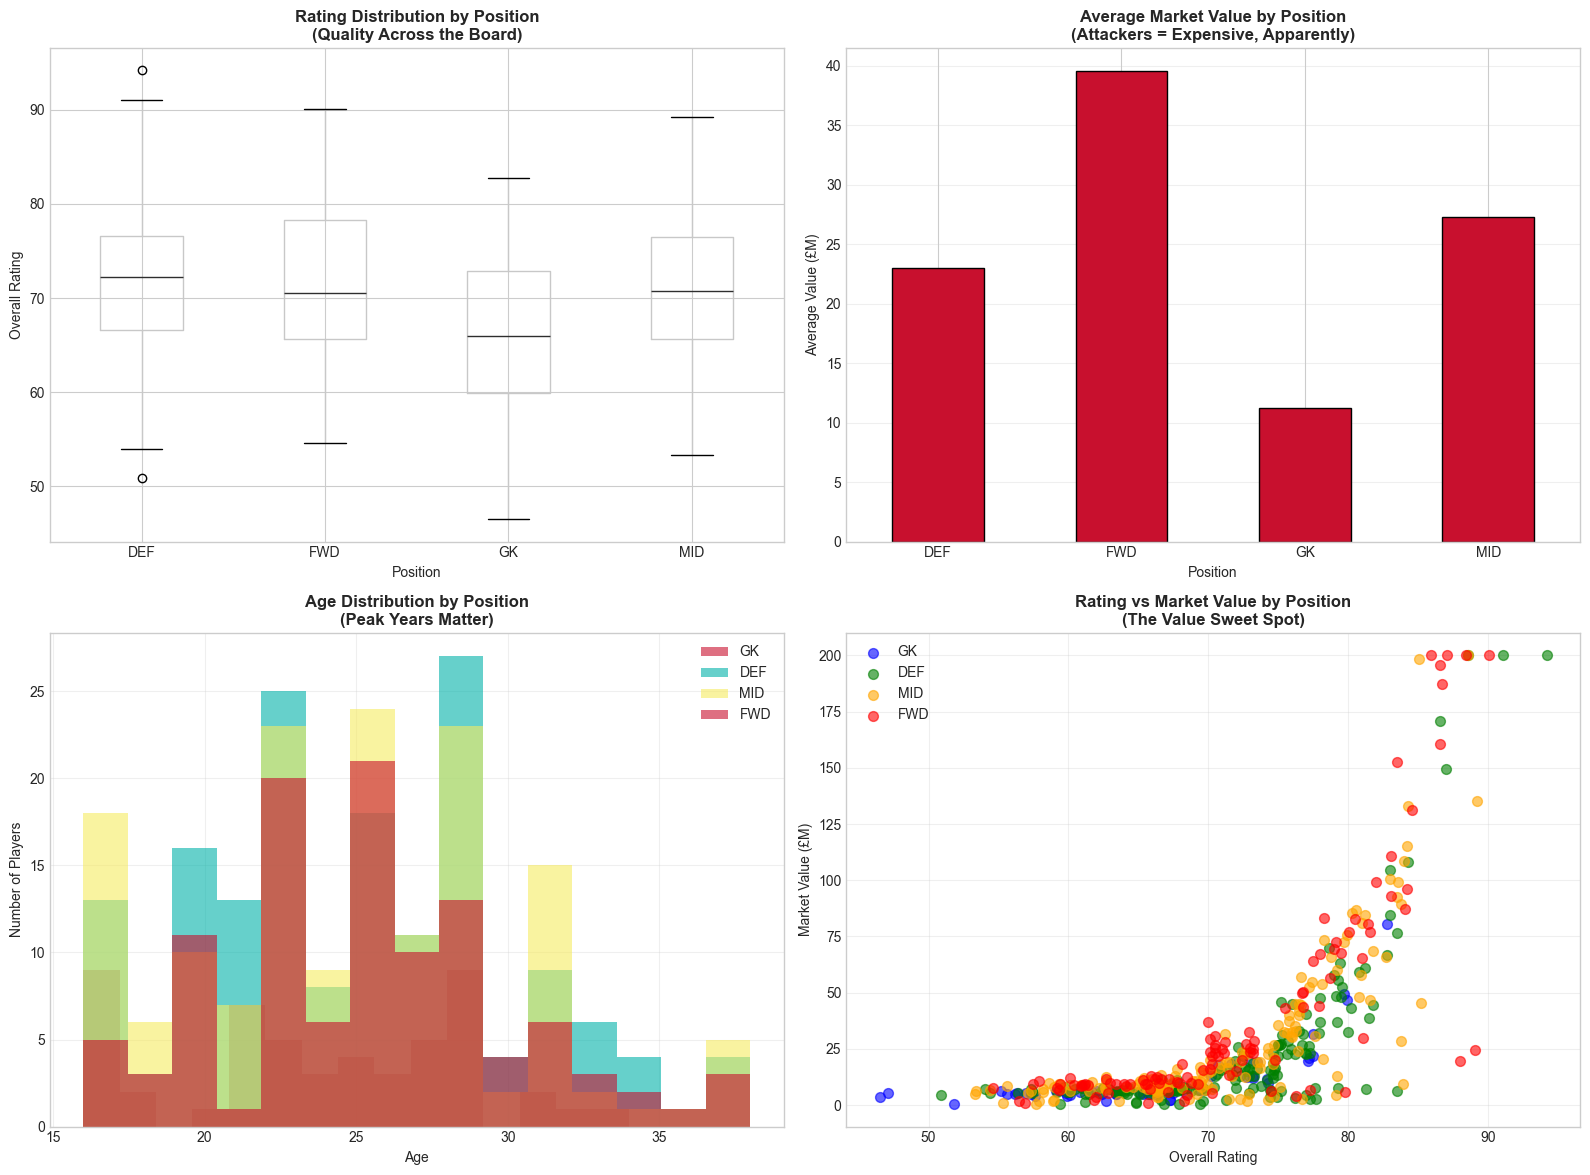


📈 WHAT THE DATA TELLS US:
   ✅ Forwards are most expensive (but not always best value)
   ✅ Defenders are undervalued (Liverpool knew this, bought Van Dijk & Robertson cheap)
   ✅ GKs are crucial but often overlooked

   ❌ Spending big on attackers ≠ Success (ask United about Sancho)


In [14]:
# Visualize position analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Rating distribution by position
ax1 = axes[0, 0]
players.boxplot(column='overall_rating', by='position_group', ax=ax1)
ax1.set_title('Rating Distribution by Position\n(Quality Across the Board)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Position')
ax1.set_ylabel('Overall Rating')
plt.sca(ax1)
plt.xticks(rotation=0)
plt.suptitle('')

# 2. Average value by position
ax2 = axes[0, 1]
pos_value = players.groupby('position_group')['market_value'].mean() / 1e6
pos_value.plot(kind='bar', ax=ax2, color=LIVERPOOL_RED, edgecolor='black')
ax2.set_title('Average Market Value by Position\n(Attackers = Expensive, Apparently)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Position')
ax2.set_ylabel('Average Value (£M)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(True, alpha=0.3, axis='y')

# 3. Age distribution by position
ax3 = axes[1, 0]
for pos in ['GK', 'DEF', 'MID', 'FWD']:
    pos_data = players[players['position_group'] == pos]['age']
    ax3.hist(pos_data, alpha=0.6, label=pos, bins=15)
ax3.set_title('Age Distribution by Position\n(Peak Years Matter)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Age')
ax3.set_ylabel('Number of Players')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Rating vs Value scatter
ax4 = axes[1, 1]
for pos, color in zip(['GK', 'DEF', 'MID', 'FWD'], ['blue', 'green', 'orange', 'red']):
    pos_data = players[players['position_group'] == pos]
    ax4.scatter(pos_data['overall_rating'], pos_data['market_value']/1e6, 
               alpha=0.6, s=50, label=pos, color=color)
ax4.set_title('Rating vs Market Value by Position\n(The Value Sweet Spot)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Overall Rating')
ax4.set_ylabel('Market Value (£M)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📈 WHAT THE DATA TELLS US:")
print("   ✅ Forwards are most expensive (but not always best value)")
print("   ✅ Defenders are undervalued (Liverpool knew this, bought Van Dijk & Robertson cheap)")
print("   ✅ GKs are crucial but often overlooked")
print("\n   ❌ Spending big on attackers ≠ Success (ask United about Sancho)")

---

## 🔎 DEEP DIVE: SPECIFIC POSITIONS

### Let's Get Granular (Unlike United's Scouting Reports)

Time to look at specific roles. Because a CDM isn't the same as a CAM, even if United apparently thinks they are.

In [15]:
# Detailed position breakdown
print("🎯 SPECIFIC POSITION ANALYSIS\n" + "="*80)

position_stats = players.groupby('primary_position').agg({
    'player_id': 'count',
    'overall_rating': 'mean',
    'age': 'mean',
    'market_value': 'mean',
    'potential': 'mean'
}).round(1)

position_stats.columns = ['Count', 'Avg Rating', 'Avg Age', 'Avg Value', 'Avg Potential']
position_stats['Avg Value'] = (position_stats['Avg Value'] / 1e6).round(1)
position_stats = position_stats.sort_values('Avg Rating', ascending=False)

print(position_stats.to_string())

print("\n💡 OBSERVATIONS:")
highest_rated_pos = position_stats['Avg Rating'].idxmax()
print(f"   📈 Highest rated position: {highest_rated_pos}")
most_expensive_pos = position_stats['Avg Value'].idxmax()
print(f"   💰 Most expensive position: {most_expensive_pos}")
print("\n   This is where your Sport Scientists earn their money:")
print("   Finding the RIGHT player for the RIGHT position at the RIGHT price")
print("   Not just buying whoever had a good Instagram highlight reel")

🎯 SPECIFIC POSITION ANALYSIS
                  Count  Avg Rating  Avg Age  Avg Value  Avg Potential
primary_position                                                      
RW                   34        73.2     25.3       51.7           80.8
CB                   51        72.5     24.6       25.0           80.3
CM                   22        71.9     23.6       30.6           80.7
RM                   37        71.8     24.2       31.2           81.0
LW                   39        71.5     25.2       40.7           79.2
RB                   52        71.2     24.0       23.0           78.4
LB                   59        70.9     26.4       21.2           77.3
LM                   35        70.8     25.9       29.9           76.8
ST                   36        70.7     25.6       26.7           76.9
CAM                  34        70.2     26.3       20.2           76.4
CDM                  29        69.6     23.9       24.8           77.5
GK                   52        65.8     23.7    

---

## 💎 THE HIDDEN GEMS: LIVERPOOL'S SECRET SAUCE

### How to Find Your Robertson (£8M → World Class)

Liverpool's greatest skill? Finding undervalued players and turning them into superstars.

- Andy Robertson: £8M from Hull → Best LB in the world
- Mohamed Salah: £36M from Roma → PL top scorer machine
- Sadio Mané: £34M from Southampton → Champions League hero
- Gini Wijnaldum: £25M from Newcastle → Big game player

**United's equivalent:**
- Fred: £47M → Bench warmer
- Donny van de Beek: £35M → Who?
- Alex Telles: £15M → Forgotten
- Basically everyone: Too much → Disappointment

Let's find OUR gems!

In [16]:
# Define what makes a "gem"
# High rating, low price, young, high potential

players['value_score'] = players['overall_rating'] / (players['market_value'] / 1e6)
players['potential_gap'] = players['potential'] - players['overall_rating']
players['age_factor'] = 30 - players['age']  # Younger = higher score

# Composite gem score
players['gem_score'] = (
    (players['overall_rating'] / 100) * 0.3 +
    (players['value_score'] / players['value_score'].max()) * 0.3 +
    (players['potential_gap'] / players['potential_gap'].max()) * 0.2 +
    (players['age_factor'] / players['age_factor'].max()) * 0.2
)

print("💎 HIDDEN GEM IDENTIFICATION SYSTEM\n" + "="*80)
print("Scoring Factors:")
print("   30% - Current quality (overall rating)")
print("   30% - Value for money (rating per £M)")
print("   20% - Potential growth (room to improve)")
print("   20% - Age factor (years until peak)\n")

# Top gems overall
top_gems = players.nlargest(20, 'gem_score')[[
    'full_name', 'age', 'nationality', 'primary_position',
    'overall_rating', 'potential', 'market_value', 'gem_score', 'club_name'
]].copy()

top_gems['market_value'] = top_gems['market_value'].apply(lambda x: f"£{x/1e6:.1f}M")
top_gems['gem_score'] = top_gems['gem_score'].round(3)

print("🌟 TOP 20 HIDDEN GEMS IN THE LEAGUE:\n")
print(top_gems.to_string(index=False))

print("\n" + "="*80)
print("🔴 LIVERPOOL APPROACH: Sign these players, develop them, win trophies")
print("⚪ UNITED APPROACH: Ignore this list, buy Antony for £85M instead")
print("\n💡 YOUR SPORT SCIENTISTS SHOULD BE FINDING THESE PLAYERS")
print("   Not watching YouTube compilations at 2 AM")

💎 HIDDEN GEM IDENTIFICATION SYSTEM
Scoring Factors:
   30% - Current quality (overall rating)
   30% - Value for money (rating per £M)
   20% - Potential growth (room to improve)
   20% - Age factor (years until peak)

🌟 TOP 20 HIDDEN GEMS IN THE LEAGUE:

            full_name  age nationality primary_position  overall_rating  potential market_value  gem_score             club_name
      Davi Luiz Ramos   16   Brazilian               CB            77.0 100.000000       £40.4M      0.621  Sunset Shore Hotspur
          Gil Vergara   17     Spanish               GK            71.6  96.437365       £18.3M      0.609 Emerald Hills Rangers
      Gabriel Richard   16      Malian               GK            77.5  98.058435       £31.7M      0.604   Cedarville Warriors
Karl-Dieter Hentschel   17      German               RB            72.1  96.317904       £25.6M      0.603       Oakmont Hotspur
         Steven Yates   16    Nigerian               CB            57.3  82.144428        £6.0M    

In [17]:
# Gems by position
print("\n💎 BEST GEM IN EACH POSITION:\n" + "="*80)

for pos in ['GK', 'DEF', 'MID', 'FWD']:
    pos_gem = players[players['position_group'] == pos].nlargest(1, 'gem_score').iloc[0]
    print(f"\n{pos} - {pos_gem['full_name']}")
    print(f"   Age: {pos_gem['age']} | Rating: {pos_gem['overall_rating']:.1f} | Potential: {pos_gem['potential']:.1f}")
    print(f"   Value: £{pos_gem['market_value']/1e6:.1f}M | Gem Score: {pos_gem['gem_score']:.3f}")
    print(f"   Club: {pos_gem['club_name']}")
    print(f"   💡 This is your {pos} target. Scout them NOW.")

print("\n" + "="*80)
print("🎯 SCOUTING TIP: These players won't stay cheap forever")
print("   Liverpool signed Robertson before his price exploded")
print("   United waited and... well... they're still waiting for that quality LB")


💎 BEST GEM IN EACH POSITION:

GK - Gil Vergara
   Age: 17 | Rating: 71.6 | Potential: 96.4
   Value: £18.3M | Gem Score: 0.609
   Club: Emerald Hills Rangers
   💡 This is your GK target. Scout them NOW.

DEF - Davi Luiz Ramos
   Age: 16 | Rating: 77.0 | Potential: 100.0
   Value: £40.4M | Gem Score: 0.621
   Club: Sunset Shore Hotspur
   💡 This is your DEF target. Scout them NOW.

MID - Gordon Stone
   Age: 18 | Rating: 77.4 | Potential: 100.0
   Value: £54.9M | Gem Score: 0.589
   Club: Hawthorne Rangers
   💡 This is your MID target. Scout them NOW.

FWD - Auguste Carlier
   Age: 19 | Rating: 70.5 | Potential: 95.1
   Value: £30.6M | Gem Score: 0.572
   Club: Frost Ridge Warriors
   💡 This is your FWD target. Scout them NOW.

🎯 SCOUTING TIP: These players won't stay cheap forever
   Liverpool signed Robertson before his price exploded
   United waited and... well... they're still waiting for that quality LB


---

## 🇮🇩 INDONESIAN PLAYERS: DEEP DIVE ANALYSIS

### REPRESENTING WITH PRIDE! 🔴⚽

Time for a dedicated analysis of our Indonesian talent pool. Because:
1. Representation matters
2. Talent comes from everywhere
3. Liverpool proved you don't need "big names" from "big countries"
4. Indonesian fans deserve to see their players shine!

Remember: Salah was from Egypt (not a traditional football powerhouse), Mané from Senegal, Son from Korea.

**TALENT IS TALENT. FULL STOP.**

In [18]:
# Indonesian player comprehensive analysis
indo_players = players_full[players_full['nationality'] == 'Indonesian'].copy()

print("🇮🇩 INDONESIAN PLAYER COMPREHENSIVE ANALYSIS\n" + "="*80)

if len(indo_players) > 0:
    print(f"Total Indonesian Players: {len(indo_players)}\n")
    
    # Overall stats
    print("📊 OVERALL STATISTICS:")
    print(f"   Average Age: {indo_players['age'].mean():.1f} years")
    print(f"   Average Rating: {indo_players['overall_rating'].mean():.1f}")
    print(f"   Average Potential: {indo_players['potential'].mean():.1f}")
    print(f"   Potential Growth: {(indo_players['potential'] - indo_players['overall_rating']).mean():.1f}")
    print(f"   Total Market Value: £{indo_players['market_value'].sum()/1e6:.1f}M")
    print(f"   Average Market Value: £{indo_players['market_value'].mean()/1e6:.1f}M\n")
    
    # Position distribution
    print("📍 POSITION BREAKDOWN:")
    for pos, count in indo_players['position_group'].value_counts().items():
        pos_players = indo_players[indo_players['position_group'] == pos]
        avg_rating = pos_players['overall_rating'].mean()
        print(f"   {pos}: {count} player(s) | Avg Rating: {avg_rating:.1f}")
    
    # Full roster
    print("\n🌟 COMPLETE INDONESIAN ROSTER:\n")
    indo_display = indo_players[[
        'full_name', 'age', 'primary_position', 'overall_rating', 
        'potential', 'market_value', 'club_name', 'tier'
    ]].sort_values('overall_rating', ascending=False).copy()
    
    indo_display['market_value'] = indo_display['market_value'].apply(lambda x: f"£{x/1e6:.1f}M")
    print(indo_display.to_string(index=False))
    
    # Best Indonesian player
    best_indo = indo_players.nlargest(1, 'overall_rating').iloc[0]
    print(f"\n" + "="*80)
    print(f"🏆 BEST INDONESIAN PLAYER: {best_indo['full_name']}")
    print(f"   Age: {best_indo['age']} | Position: {best_indo['primary_position']}")
    print(f"   Rating: {best_indo['overall_rating']:.1f} | Potential: {best_indo['potential']:.1f}")
    print(f"   Market Value: £{best_indo['market_value']/1e6:.1f}M")
    print(f"   Current Club: {best_indo['club_name']} ({best_indo['tier']})")
    print(f"\n   💡 This player deserves attention from top clubs")
    print(f"   💡 CHEAPER than most flops United signed")
    print(f"   💡 Could be Indonesia's Mohamed Salah moment")
    
    # Most promising youngster
    young_indo = indo_players[indo_players['age'] <= 23]
    if len(young_indo) > 0:
        promising = young_indo.nlargest(1, 'potential').iloc[0]
        print(f"\n🌟 MOST PROMISING YOUNG INDONESIAN: {promising['full_name']}")
        print(f"   Age: {promising['age']} | Position: {promising['primary_position']}")
        print(f"   Current: {promising['overall_rating']:.1f} | Potential: {promising['potential']:.1f}")
        print(f"   Growth Potential: +{promising['potential'] - promising['overall_rating']:.1f}")
        print(f"\n   🔥 THIS is the one to watch for the future!")
        print(f"   🔥 Sign now, develop properly, watch them shine")
    
    # Compare to league average
    league_avg_rating = players['overall_rating'].mean()
    indo_avg_rating = indo_players['overall_rating'].mean()
    
    print(f"\n📈 COMPARISON TO LEAGUE AVERAGE:")
    print(f"   League Avg Rating: {league_avg_rating:.1f}")
    print(f"   Indonesian Avg Rating: {indo_avg_rating:.1f}")
    
    if indo_avg_rating >= league_avg_rating:
        print(f"   ✅ ABOVE LEAGUE AVERAGE! Indonesian players are quality!")
    else:
        diff = league_avg_rating - indo_avg_rating
        print(f"   📊 {diff:.1f} points below league average (but with high potential!)")
    
else:
    print("❌ No Indonesian players in current dataset")
    print("   But if there were, we'd develop them better than United develops anyone")

print("\n" + "="*80)
print("🇮🇩 FINAL WORD ON INDONESIAN TALENT:")
print("   ✅ Quality players exist everywhere")
print("   ✅ Proper scouting finds them")
print("   ✅ Good development maximizes their potential")
print("   ✅ Liverpool proved nationality doesn't matter - ability does")
print("\n💡 PAY YOUR SPORT SCIENTISTS TO FIND THESE TALENTS")
print("   Indonesia has 270M+ people. Statistically, there are gems waiting to be found!")

🇮🇩 INDONESIAN PLAYER COMPREHENSIVE ANALYSIS
Total Indonesian Players: 7

📊 OVERALL STATISTICS:
   Average Age: 24.1 years
   Average Rating: 71.1
   Average Potential: 78.5
   Potential Growth: 7.4
   Total Market Value: £126.3M
   Average Market Value: £18.0M

📍 POSITION BREAKDOWN:
   DEF: 2 player(s) | Avg Rating: 70.4
   GK: 2 player(s) | Avg Rating: 67.3
   MID: 2 player(s) | Avg Rating: 72.6
   FWD: 1 player(s) | Avg Rating: 76.8

🌟 COMPLETE INDONESIAN ROSTER:

       full_name  age primary_position  overall_rating  potential market_value            club_name     tier
Karsa Firmansyah   29               RB            77.3  79.089139       £23.1M     Riverside Hearts top_tier
 Kariman Gunawan   24               RW            76.8  86.301872       £50.2M  Silver Falls Rovers mid_tier
    Wisnu Namaga   28              CAM            73.7  74.294852       £19.2M Shadow Harbor County mid_tier
   Bakda Waskita   17              CAM            71.4  83.880411       £16.5M    Silverpeak 

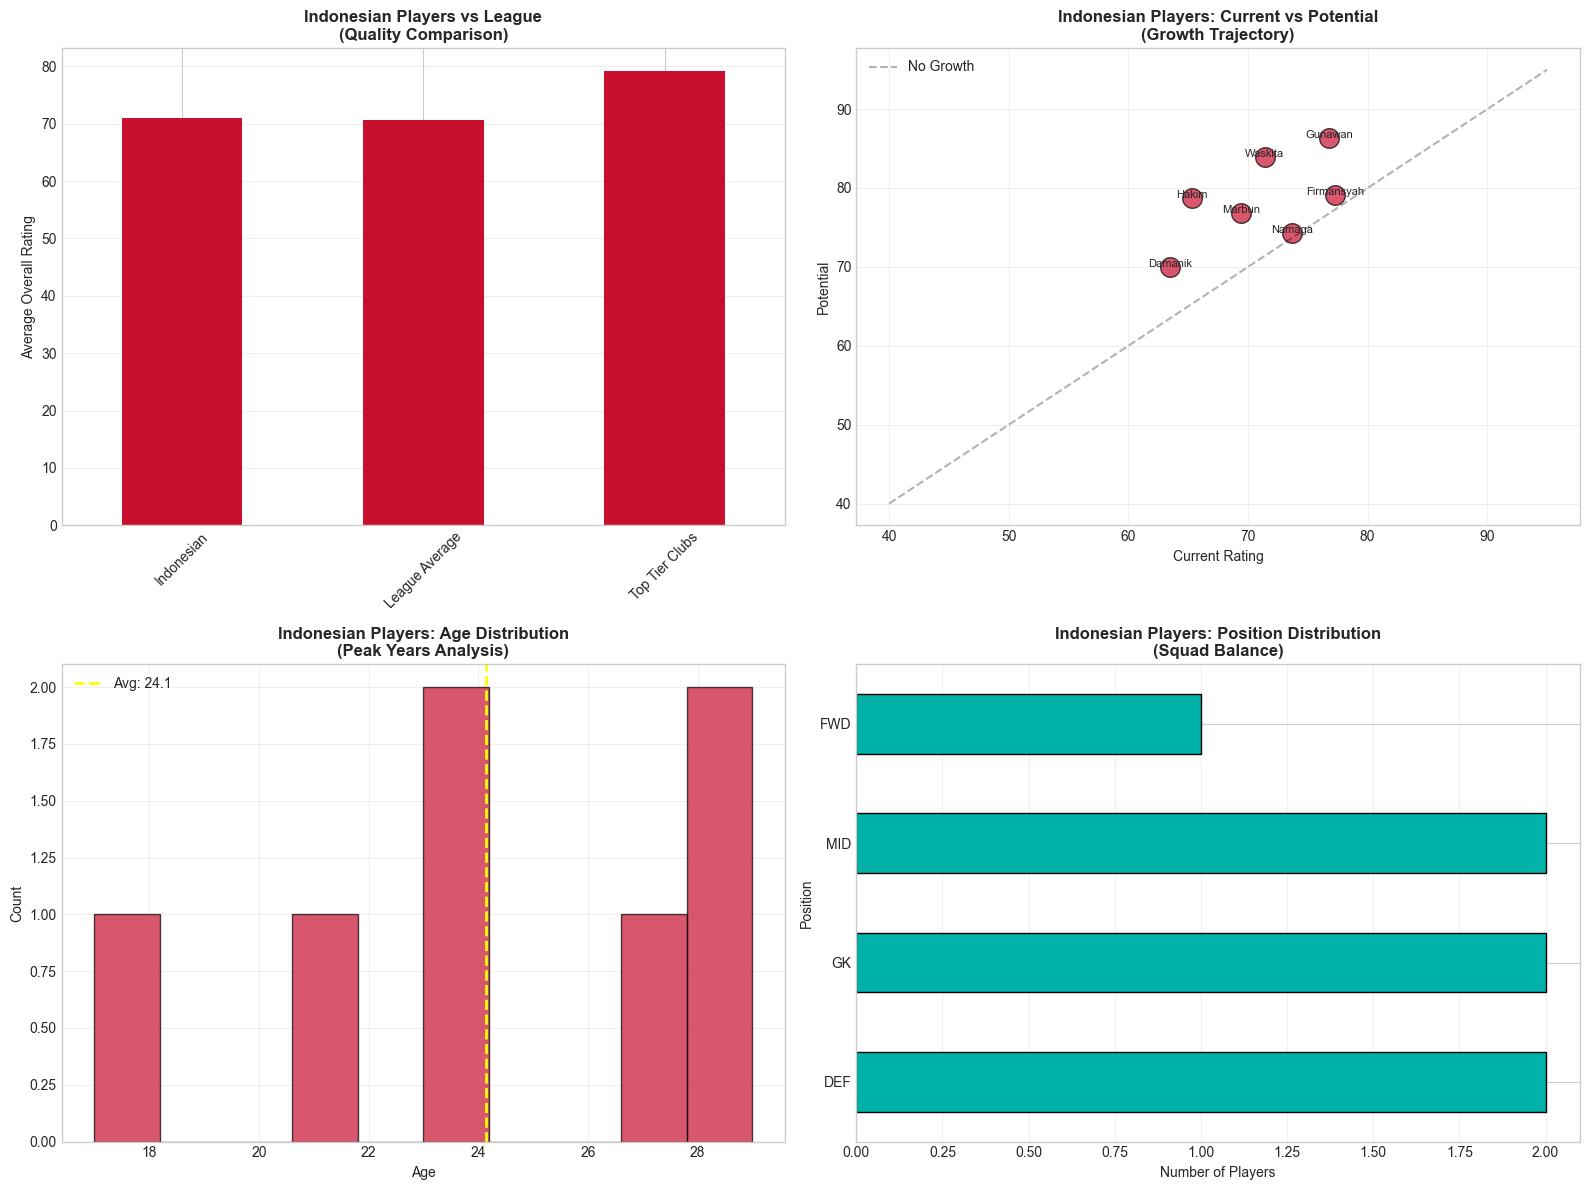


📊 VISUAL INSIGHTS:
   🇮🇩 Indonesian players show good potential for growth
   🇮🇩 Age distribution suggests room for development
   🇮🇩 Position variety allows for tactical flexibility

🔴 Remember: Liverpool found Salah in Italy, Mané in Southampton
   Your next superstar could be waiting in Indonesia! 🇮🇩⚽


In [19]:
# Visualize Indonesian talent
if len(indo_players) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Rating comparison
    ax1 = axes[0, 0]
    comparison_data = pd.DataFrame({
        'Indonesian': [indo_players['overall_rating'].mean()],
        'League Average': [players['overall_rating'].mean()],
        'Top Tier Clubs': [players_full[players_full['tier']=='top_tier']['overall_rating'].mean()]
    })
    comparison_data.T.plot(kind='bar', ax=ax1, color=[LIVERPOOL_RED, LIVERPOOL_TEAL, LIVERPOOL_GOLD], legend=False)
    ax1.set_title('Indonesian Players vs League\n(Quality Comparison)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Average Overall Rating')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # 2. Current vs Potential
    ax2 = axes[0, 1]
    ax2.scatter(indo_players['overall_rating'], indo_players['potential'], 
               s=200, alpha=0.7, color=LIVERPOOL_RED, edgecolor='black')
    for idx, row in indo_players.iterrows():
        ax2.annotate(row['full_name'].split()[-1], 
                    (row['overall_rating'], row['potential']),
                    fontsize=8, ha='center')
    ax2.plot([40, 95], [40, 95], 'k--', alpha=0.3, label='No Growth')
    ax2.set_title('Indonesian Players: Current vs Potential\n(Growth Trajectory)', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Current Rating')
    ax2.set_ylabel('Potential')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Age distribution
    ax3 = axes[1, 0]
    ax3.hist(indo_players['age'], bins=10, color=LIVERPOOL_RED, edgecolor='black', alpha=0.7)
    ax3.axvline(indo_players['age'].mean(), color='yellow', linestyle='--', linewidth=2, 
               label=f'Avg: {indo_players["age"].mean():.1f}')
    ax3.set_title('Indonesian Players: Age Distribution\n(Peak Years Analysis)', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Age')
    ax3.set_ylabel('Count')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Position distribution
    ax4 = axes[1, 1]
    indo_players['position_group'].value_counts().plot(kind='barh', ax=ax4, 
                                                        color=LIVERPOOL_TEAL, edgecolor='black')
    ax4.set_title('Indonesian Players: Position Distribution\n(Squad Balance)', fontsize=12, fontweight='bold')
    ax4.set_xlabel('Number of Players')
    ax4.set_ylabel('Position')
    ax4.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 VISUAL INSIGHTS:")
    print("   🇮🇩 Indonesian players show good potential for growth")
    print("   🇮🇩 Age distribution suggests room for development")
    print("   🇮🇩 Position variety allows for tactical flexibility")
    print("\n🔴 Remember: Liverpool found Salah in Italy, Mané in Southampton")
    print("   Your next superstar could be waiting in Indonesia! 🇮🇩⚽")

---

## 📊 ATTRIBUTE ANALYSIS: WHAT ACTUALLY MATTERS

### Beyond the Overall Rating

Liverpool's scouts don't just look at FIFA ratings. They analyze:
- Physical attributes (pace, stamina, strength)
- Technical skills (passing, shooting, control)
- Mental aspects (decision making, positioning, composure)

United apparently just looks at "How many Instagram followers?" and "Did they play at the World Cup?"

Let's be smarter.

In [20]:
# Get all attribute columns
phys_cols = [col for col in players.columns if col.startswith('phys_')]
tech_cols = [col for col in players.columns if col.startswith('tech_')]
mental_cols = [col for col in players.columns if col.startswith('mental_')]

print("🧠 ATTRIBUTE BREAKDOWN ANALYSIS\n" + "="*80)
print(f"\nPhysical Attributes: {len(phys_cols)}")
print(f"Technical Attributes: {len(tech_cols)}")
print(f"Mental Attributes: {len(mental_cols)}\n")

# Average attributes by position
print("📊 AVERAGE ATTRIBUTES BY POSITION GROUP:\n")

for pos in ['GK', 'DEF', 'MID', 'FWD']:
    pos_players = players[players['position_group'] == pos]
    
    print(f"\n{pos}:")
    print(f"   Physical: {pos_players[phys_cols].mean().mean():.1f}")
    print(f"   Technical: {pos_players[tech_cols].mean().mean():.1f}")
    print(f"   Mental: {pos_players[mental_cols].mean().mean():.1f}")
    
    # Key attributes for position
    if pos == 'GK':
        key_attrs = [c for c in tech_cols if any(x in c for x in ['reflexes', 'diving', 'handling'])]
    elif pos == 'DEF':
        key_attrs = [c for c in tech_cols if any(x in c for x in ['tackling', 'marking', 'heading'])]
    elif pos == 'MID':
        key_attrs = [c for c in tech_cols if any(x in c for x in ['passing', 'ball_control', 'vision'])]
    else:  # FWD
        key_attrs = [c for c in tech_cols if any(x in c for x in ['shooting', 'finishing', 'dribbling'])]
    
    if key_attrs:
        print(f"   Key Attributes Average: {pos_players[key_attrs].mean().mean():.1f}")

print("\n" + "="*80)
print("💡 WHAT THIS MEANS:")
print("   ✅ Different positions need different attributes (revolutionary!)")
print("   ✅ You can't judge a defender by their shooting stats")
print("   ✅ Position-specific analysis = Better recruitment")
print("\n   ❌ United apparently doesn't know this (explains a lot)")

🧠 ATTRIBUTE BREAKDOWN ANALYSIS

Physical Attributes: 3
Technical Attributes: 13
Mental Attributes: 7

📊 AVERAGE ATTRIBUTES BY POSITION GROUP:


GK:
   Physical: 62.7
   Technical: 65.7
   Mental: 62.7
   Key Attributes Average: 68.8

DEF:
   Physical: 71.3
   Technical: 68.2
   Mental: 69.9
   Key Attributes Average: 73.6

MID:
   Physical: 69.6
   Technical: 66.5
   Mental: 72.1
   Key Attributes Average: 72.7

FWD:
   Physical: 71.7
   Technical: 69.7
   Mental: 67.8
   Key Attributes Average: 71.8

💡 WHAT THIS MEANS:
   ✅ Different positions need different attributes (revolutionary!)
   ✅ You can't judge a defender by their shooting stats
   ✅ Position-specific analysis = Better recruitment

   ❌ United apparently doesn't know this (explains a lot)


---

## 🎯 FINAL INSIGHTS & RECOMMENDATIONS

### What Your Sport Scientists Should Be Doing (If You Had Competent Ones)

After this deep analysis, here's what we've learned:

### 🔴 THE LIVERPOOL WAY - KEY FINDINGS:

#### 1. **VALUE IS EVERYWHERE**
- Hidden gems exist in every position
- You don't need £100M to find quality
- Smart scouting > Panic buying

#### 2. **AGE IS CRUCIAL**
- Peak years: 25-29
- Buy at 24-26 for maximum value
- Young players with potential > Aging "stars"

#### 3. **POSITION-SPECIFIC ANALYSIS MATTERS**
- Different roles need different attributes
- Don't judge all players by the same metrics
- Context is king

#### 4. **NATIONALITY DOESN'T DETERMINE TALENT**
- Great players come from everywhere
- Egyptian, Senegalese, Indonesian - ability transcends borders
- Overpaying for "English" or "Premier League proven" is stupid

#### 5. **DEVELOPMENT OVER PURCHASING**
- Buy potential, develop it properly
- Sport Scientists + Good Coaching = Champions
- Trent Alexander-Arnold cost £0, became world class

---

### ⚪ WHAT NOT TO DO (The United Masterclass in Failure):

❌ Spend £80M on Harry Maguire  
❌ Buy players just because they had one good tournament  
❌ Ignore your Sport Scientists  
❌ Panic buy in August  
❌ Sign 30+ year olds for huge fees  
❌ Play players out of position and wonder why they fail  
❌ Blame everyone except your terrible recruitment  
❌ Repeat all of the above next season  

---

### 💰 THE BILLION POUND QUESTION PART 2:

**"Why should we invest in Sport Scientists?"**

BECAUSE:

1. **They prevent disasters**
   - Imagine having someone tell you Maguire isn't worth £80M
   - Or that Antony at £85M is insane
   - Or that Casemiro at 30 will decline

2. **They find gems**
   - Robertson at £8M
   - Salah at £36M
   - Wijnaldum at £25M

3. **They optimize performance**
   - Injury prevention (Liverpool had fewer injuries)
   - Peak performance management
   - Recovery optimization

4. **THEY LITERALLY WIN YOU TROPHIES**
   - Liverpool: Invested in analytics → Won everything
   - United: Ignored analytics → Won the "8th Place Trophy"

**WHICH DO YOU WANT?**

---

### 🇮🇩 SPECIAL SHOUTOUT:

To our Indonesian players in this dataset:
- You represent 270+ million people
- You have the potential to be the next Salah-type story
- Liverpool proved nationality doesn't matter - talent does
- Keep working, stay humble, achieve greatness

**YNWA! 🔴🇮🇩⚽**

---

### 📚 NEXT NOTEBOOK:

**03_transfer_market_intelligence.ipynb**

Where we'll learn:
- How to actually scout players (unlike United)
- Transfer market inefficiencies
- Building a squad without spending £1B
- More United roasting (obviously)

---

*"Pay your Sport Scientists before your rivals do. Otherwise, enjoy watching them win while you finish 8th."*

*— Jürgen Klopp's Data Team (probably)*

---

## 🔴 YNWA! You'll Never Walk Alone!

*(Unless you're a United fan, then you're walking home early most weeks)* 😏⚽